Loading data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("DataScience_salaries_2024.csv")

data.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
5,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
6,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
7,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
8,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,IN,50,IN,L
9,2022,EN,FT,Research Engineer,5500000,JPY,41809,JP,50,JP,L


Basic information

In [35]:
print("Instances: " + str(data.shape[0]))
print("Attributes: " + str(data.shape[1]) +"\n")
data.info()
data.describe()

Instances: 14838
Attributes: 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


There are 14838 instance and 11 attributes. There are 4 numerical attributes and 7 categorical attributes. There is no missing value.

/var/folders/pg/091z68c93wb7x_j1473t961h0000gn/T/ipykernel_33683/4174624959.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="job_title", data=filtered_jobs, order=filtered_jobs['job_title'].value_counts().index, palette=color)
/var/folders/pg/091z68c93wb7x_j1473t961h0000gn/T/ipykernel_33683/4174624959.py:11: UserWarning: 
The palette list has fewer values (12) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="job_title", data=filtered_jobs, order=filtered_jobs['job_title'].value_counts().index, palette=color)


<Axes: xlabel='job_title', ylabel='count'>

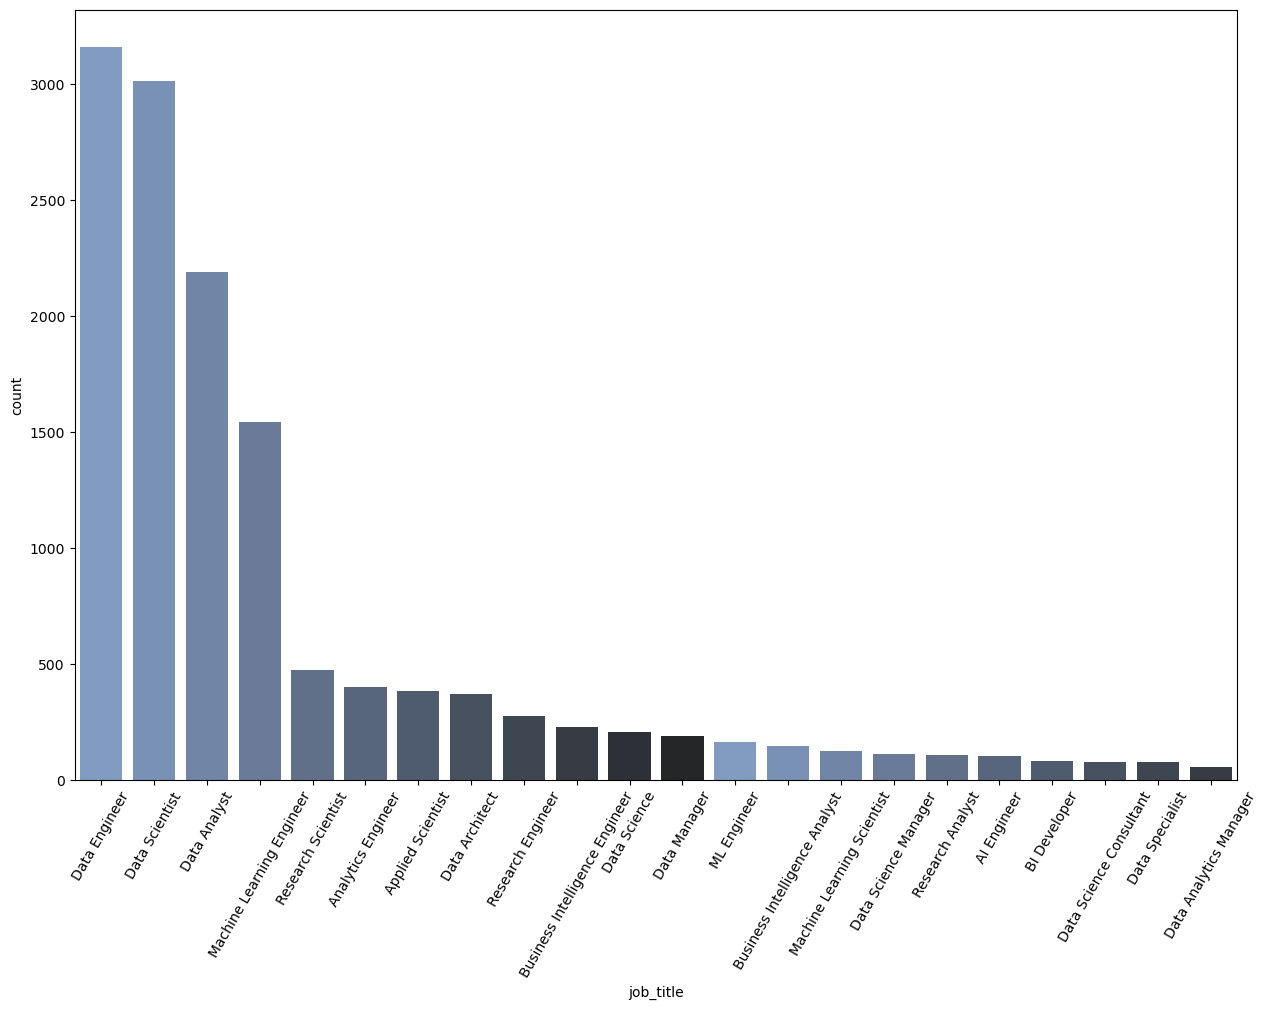

In [36]:
job_counts = data['job_title'].value_counts().reset_index()
job_counts.columns = ['job_title', 'count']

filtered_jobs = data[data['job_title'].isin(job_counts[job_counts['count'] > 50]['job_title'])]


plt.rc('xtick', labelsize=10)
plt.figure(figsize=(15, 10))
plt.xticks(rotation=60)
color = sns.dark_palette("#79C", n_colors=12, reverse=True)
sns.countplot(x="job_title", data=filtered_jobs, order=filtered_jobs['job_title'].value_counts().index, palette=color)

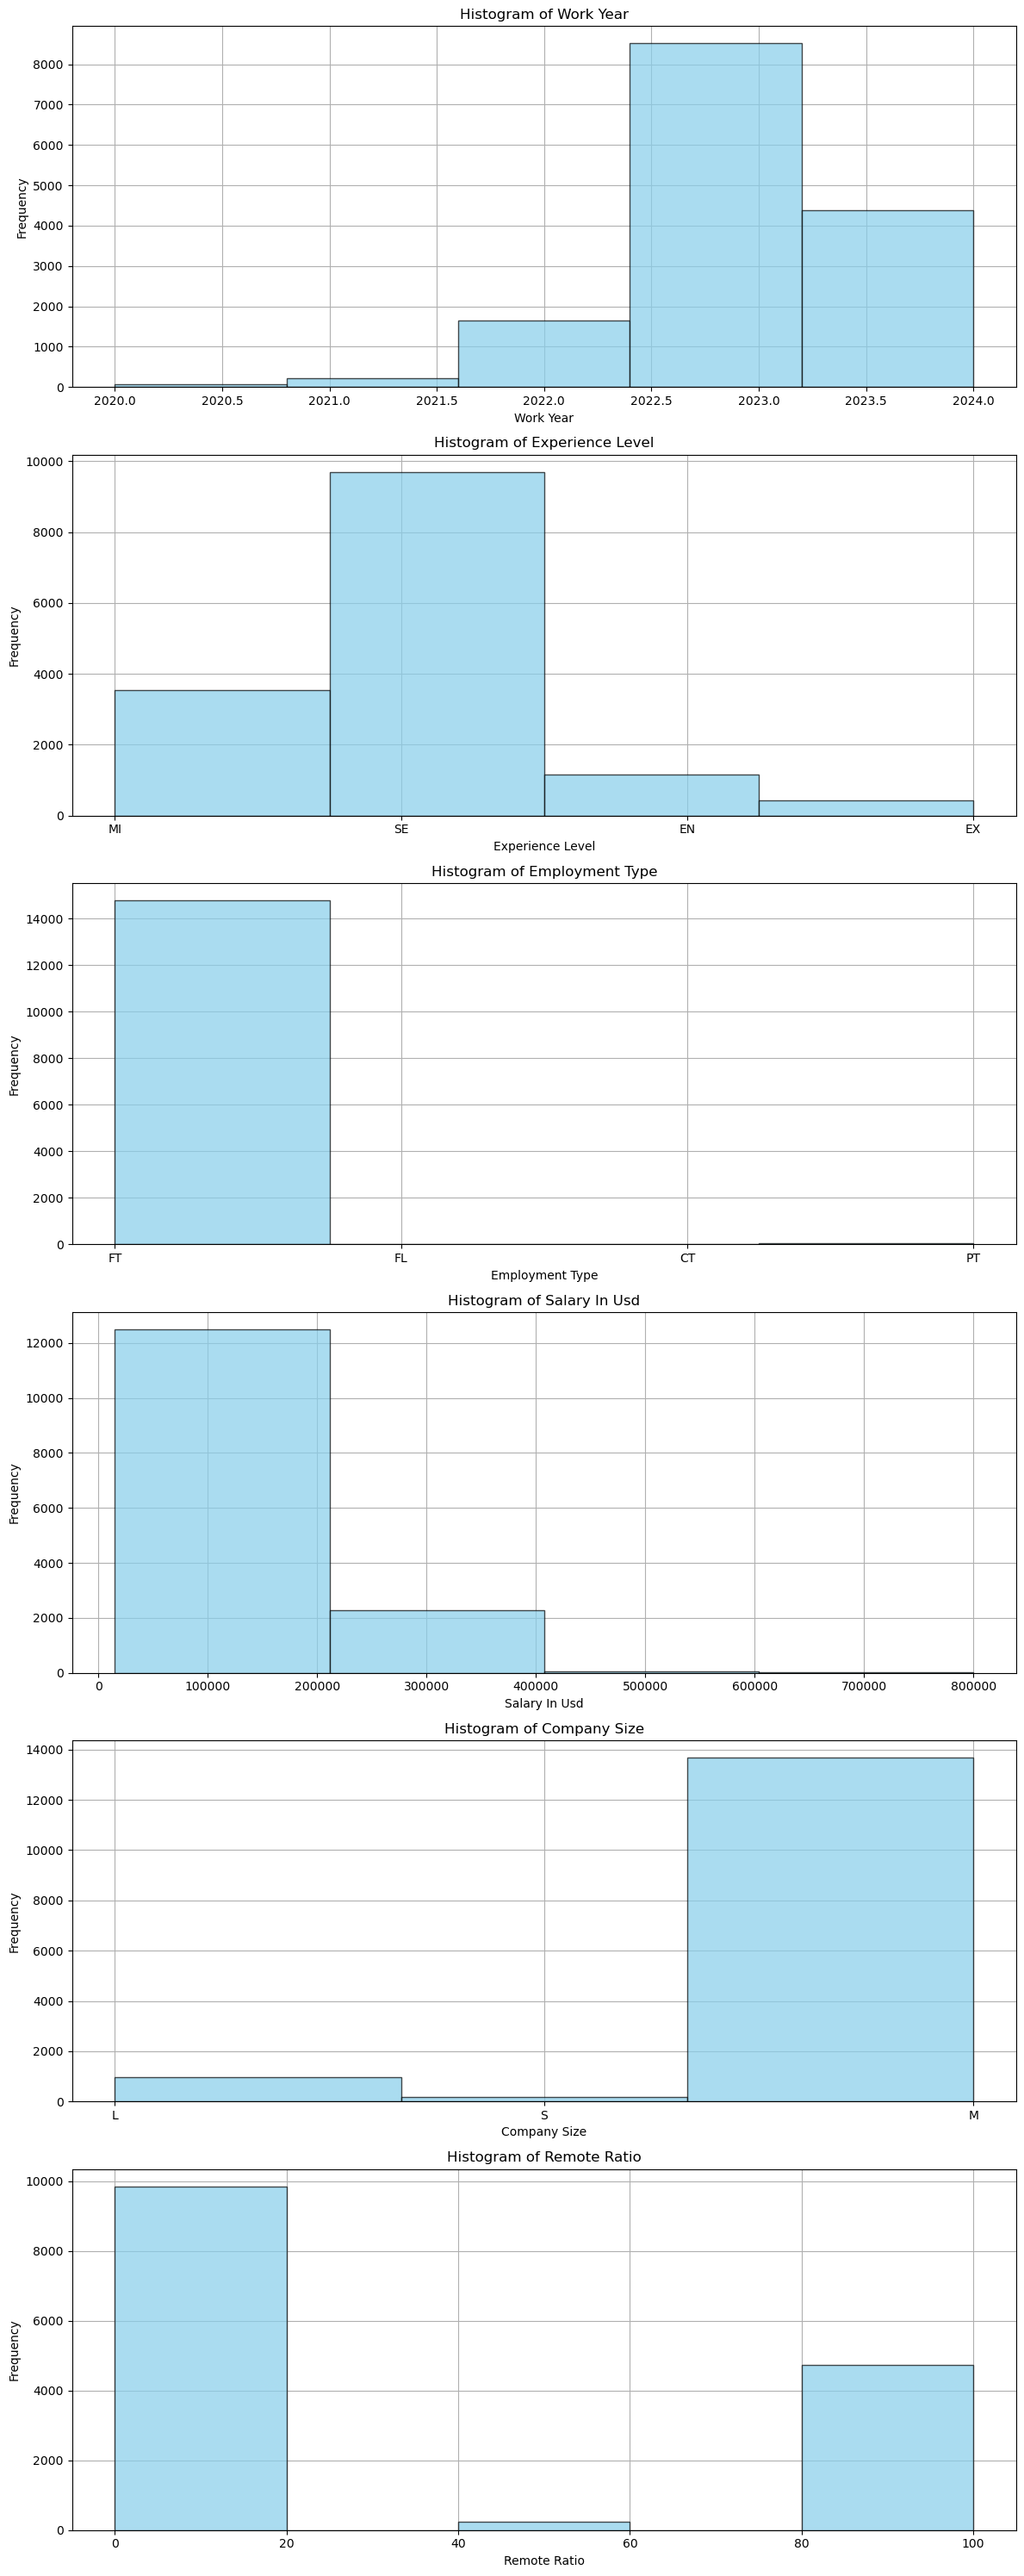

In [44]:
columns_to_plot = ['work_year','experience_level','employment_type','salary_in_usd','company_size', 'remote_ratio']
bins = [5, 4, 4, 4, 3, 5]
num_plots = len(columns_to_plot)

fig, axs = plt.subplots(num_plots, 1, figsize=(12, num_plots * 5))

# Plot histograms using a for loop
for i, col in enumerate(columns_to_plot):
    axs[i].hist(data[col], bins=bins[i], color='skyblue', edgecolor='black', alpha=0.7)
    axs[i].set_xlabel(col.replace('_', ' ').title())
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col.replace("_", " ").title()}')
    axs[i].grid(True)  # Add grid lines
    axs[i].set_axisbelow(True)  # Ensure grid lines are behind bars

plt.tight_layout()
plt.show()

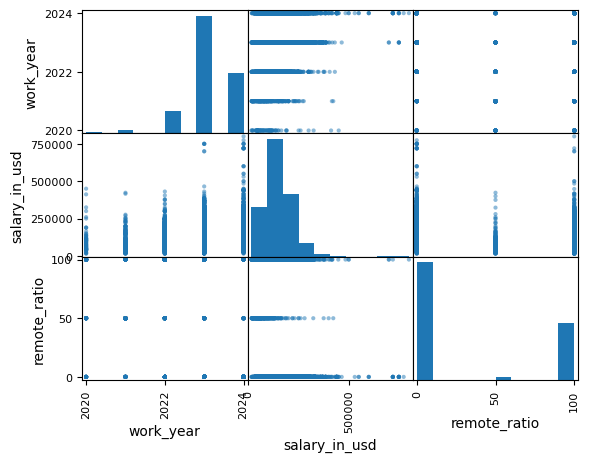

In [48]:
from pandas.plotting import scatter_matrix

attributes = ['work_year','salary_in_usd', 'remote_ratio']

scatter_matrix(data[attributes])
plt.show()